In [1]:
parameters = '/Users/chena/dart_id/sqc_varied_test/parameters.txt'
config = '/Users/chena/dart_id/sqc_varied_test/example_sqc_67_95_varied.yaml'
exp_params = '/Users/chena/dart_id/sqc_varied_test/exp_params.txt'
peptide_params = '/Users/chena/dart_id/sqc_varied_test/peptide_params.txt'
pair_params = '/Users/chena/dart_id/sqc_varied_test/pair_params.txt'

In [ ]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import norm, lognorm, laplace

from yaml import load as yaml_load, dump as yaml_dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

# sns.set(style='whitegrid', context='paper')

%matplotlib inline

In [ ]:
print('Generated on {}'.format(datetime.datetime.now()))

# DART-ID Report

*Auto-generated report by dart_id*

- Please visit [https://dart-id.slavovlab.net/](https://dart-id.slavovlab.net/) for more information
- View the source code on GitHub: [https://github.com/SlavovLab/DART-ID](https://github.com/SlavovLab/DART-ID)
- Contact the authors by email: [nslavov{at}northeastern.edu](mailto:nslavov@northeastern.edu) 

**Contents:**

1. [Residual Summary](#Residual-Summary)
2. [Alignment Summaries](#Alignment-Summaries)
3. [PEP Shifts](#PEP-Shifts)
4. [Increase in Confident PSMs](#Increase-in-Confident-PSMs)

# Load Data

Load the parameters.txt file (stripped down version of the updated input file), model parameters files (exp, peptide, and pair), and the configuration file used for this run of DART-ID

Print the first 10 rows of the parameters dataframe, just as a preview

In [4]:
# Allow passing in the dataframes as python objects or file paths to be loaded here

if type(config) == str:
    with open(config, 'r') as f:
        config = yaml_load(f, Loader=Loader)

params = {}
try:
    params['exp'] = pd.read_json(exp_params)
except ValueError:
    params['exp'] = pd.read_csv(exp_params, sep='\t', low_memory=False)

try:
    params['peptide'] = pd.read_json(peptide_params),
except ValueError:
    params['peptide'] = pd.read_csv(peptide_params, sep='\t', low_memory=False)


try:
    params['pair'] = pd.read_json(pair_params),
except ValueError:
    params['pair'] = pd.read_csv(pair_params, sep='\t', low_memory=False)

if type(parameters) == str:
    df = pd.read_csv(parameters, sep='\t', low_memory=False)
else:
    df = parameters

df.head(10)

Modified sequence             Raw file  Retention time       PEP  \
0  _(ac)AAAAAAAAAAGAAGGR_   180320S_QC_SQC67A1          24.058       NaN   
1  _(ac)AAAAAAAAAAGAAGGR_    180324S_QC_SQC71A          37.601       NaN   
2  _(ac)AAAAAAAAAAGAAGGR_    180324S_QC_SQC71B          37.622       NaN   
3  _(ac)AAAAAAAAAAGAAGGR_    180408S_QC_SQC75A          37.411       NaN   
4  _(ac)AAAAAAAAAAGAAGGR_    180409S_QC_SQC76B          37.268       NaN   
5  _(ac)AAAAAAAAAAGAAGGR_   180416S_QC_SQC78A1          36.599       NaN   
6  _(ac)AAAAAAAAAAGAAGGR_    180420S_QC_SQC79B          36.788       NaN   
7           _AAAAAAAAAAR_    180406S_QC_SQC74B          14.674  0.817670   
8           _AAAAAAALQAK_  180324S_QC_SQC67C10          36.629  0.000042   
9           _AAAAAAALQAK_   180324S_QC_SQC68A1          32.471  0.000032   

   Charge                              Leading razor protein  \
0       2  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...   
1       2  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...   
2       2  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...   
3       2  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...   
4       2  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...   
5       2  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...   
6       2  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...   
7       2  sp|Q9Y651|SOX21_HUMANTranscriptionfactorSOX-21...   
8       3  sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...   
9       3  sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...   

                                            Proteins  Retention length  \
0  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...           0.17284   
1  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...           0.24698   
2  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...           0.23656   
3  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...           0.35161   
4  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...           0.46114   
5  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...           0.29725   
6  sp|Q86U42-2|PABP2_HUMANIsoform2ofPolyadenylate...           0.26411   
7  sp|Q9Y651|SOX21_HUMANTranscriptionfactorSOX-21...           1.00000   
8  sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...           0.24320   
9  sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...           0.48452   

   Intensity  dart_PEP  ...       mu       muij  rt_minus   rt_plus   sigmaij  \
0   268270.0       NaN  ...      NaN        NaN       NaN       NaN       NaN   
1   351800.0       NaN  ...      NaN        NaN       NaN       NaN       NaN   
2   281110.0       NaN  ...      NaN        NaN       NaN       NaN       NaN   
3   469500.0       NaN  ...      NaN        NaN       NaN       NaN       NaN   
4   619860.0       NaN  ...      NaN        NaN       NaN       NaN       NaN   
5   295880.0       NaN  ...      NaN        NaN       NaN       NaN       NaN   
6   890760.0       NaN  ...      NaN        NaN       NaN       NaN       NaN   
7        NaN  0.817670  ...      NaN        NaN       NaN       NaN       NaN   
8  4751500.0  0.000008  ...  35.0433  37.345779  0.043649  0.218921  0.286773   
9  1947900.0  0.001843  ...  35.0433  33.109322  0.061802  0.001074  0.209318   

   residual  input_id  exp_id  peptide_id  stan_peptide_id  
0       NaN         0     NaN         NaN              NaN  
1       NaN         0     NaN         NaN              NaN  
2       NaN         0     NaN         NaN              NaN  
3       NaN         0     NaN         NaN              NaN  
4       NaN         0     NaN         NaN              NaN  
5       NaN         0     NaN         NaN              NaN  
6       NaN         0     NaN         NaN              NaN  
7       NaN         0     NaN         NaN              NaN  
8  0.716779         0     1.0         0.0              0.0  
9  0.638322         0     2.0         0.0              0.0  

[10 rows x 23 columns]

# Residual Summary

A boxplot for each experiment aligned, where the values are the residual retention time: the absolute error between the observed RT and the inferred RT:

\\[  \mbox{Residual RT} = \mbox{abs}(\mbox{Observed RT} - \mbox{Inferred RT}) \\]

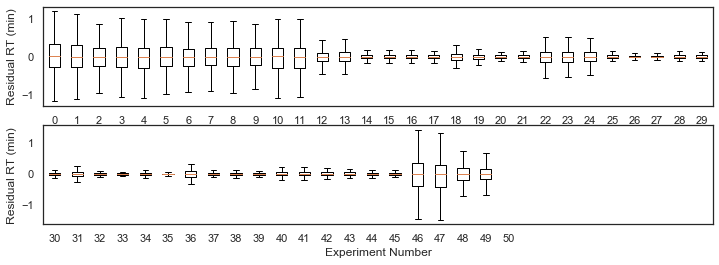

In [5]:
sns.set(style='white')

num_experiments = len(df['exp_id'].unique())
df['residual'] = df[config['col_names']['retention_time']] - df['muij']

plots_per_row = 30
if num_experiments < plots_per_row:
    plots_per_row = num_experiments

num_rows = int(np.ceil(num_experiments / plots_per_row))

resi = []

for i in range(0, num_rows):
    ax = plt.subplot2grid((num_rows, 1), (i, 0))

    if (i + 1) * plots_per_row > num_experiments:
        resi = [df['residual'][(df['exp_id'] == i) & (~pd.isnull(df['residual']))] for i in range((i * plots_per_row), num_experiments)]
        ax.boxplot(resi, showfliers=False)
        ax.set_xticklabels(np.arange((i * plots_per_row), num_experiments, 1))
    else:
        resi = [df['residual'][(df['exp_id'] == i) & (~pd.isnull(df['residual']))] for i in range((i * plots_per_row), ((i + 1) * plots_per_row))]
        ax.boxplot(resi, showfliers=False)
        ax.set_xticklabels(np.arange((i * plots_per_row), ((i + 1) * plots_per_row), 1))

    #ax.violinplot(resi, showmedians=True, showextrema=True)
    #ax.boxplot(resi, showfliers=False)
    ax.set_xticks(np.arange(1, plots_per_row + 1, 1))

    ax.set_xlabel('Experiment Number')
    ax.set_ylabel('Residual RT (min)')

#plt.subplots_adjust(hspace=0.6, wspace=0.3)
#plt.tight_layout()

# finalize and save figure
f = plt.gcf()
#f.text(0.5, 0, 'Experiment Number', fontsize=16, ha='center', va='center')
#f.text(0.06, 0.5, 'Residual RT (min)', fontsize=16, ha='center', va='center', rotation='vertical')
f.set_size_inches(12, num_rows * 2)

plt.show()


# Alignment Summaries

Examine how the alignment performed for every experiment in the input data. This is particularly useful if you observe that an experiment from the [residual boxplots](#Residual-Summary) has unusually high residual RTs.

The left plot shows for each peptide the observed RT versus the reference RT (\\( \mu \\)), with the experimental transforms overlaid (in this case, a two-segment regression).

The right plot shows the shifts in residual RT as a function of the inferred RT, where each peptide is also colored by its PEP (spectral error probability). The red lines denote the 2.5% and 97.5% percentile. The ranges of the experimental transform are also overlaid in the same colors.

/Users/chena/miniconda3/envs/jupyter/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Generating Summary for Experiment 1 | 180320S_QC_SQC67A1


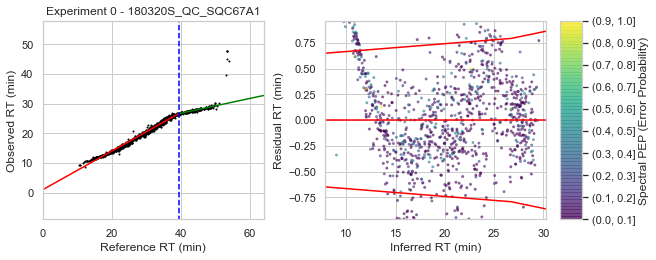

Generating Summary for Experiment 2 | 180324S_QC_SQC67C10


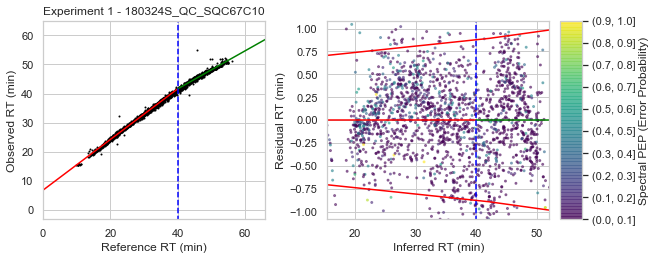

Generating Summary for Experiment 3 | 180324S_QC_SQC68A1


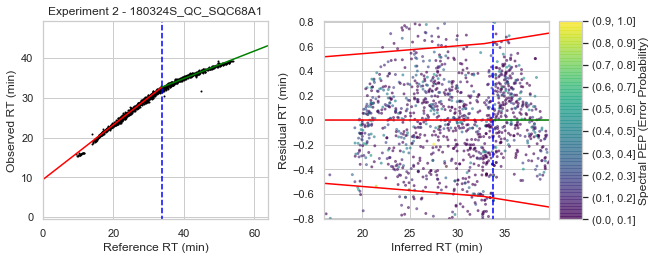

Generating Summary for Experiment 4 | 180324S_QC_SQC68B1


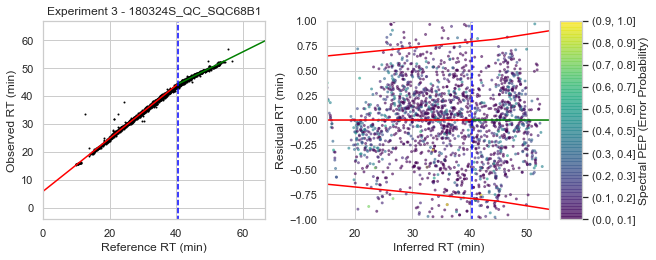

Generating Summary for Experiment 5 | 180324S_QC_SQC69A


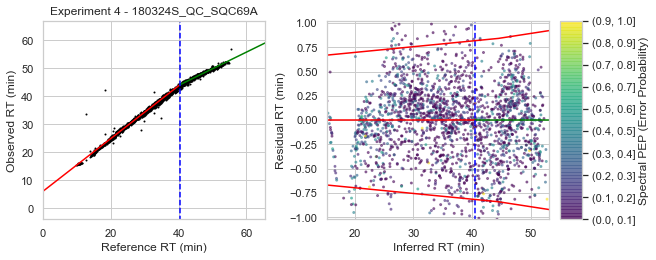

Generating Summary for Experiment 6 | 180324S_QC_SQC69B


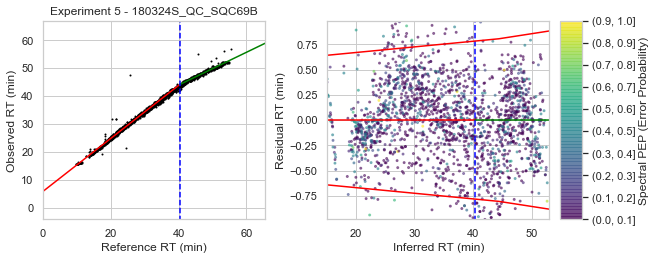

Generating Summary for Experiment 7 | 180324S_QC_SQC70A


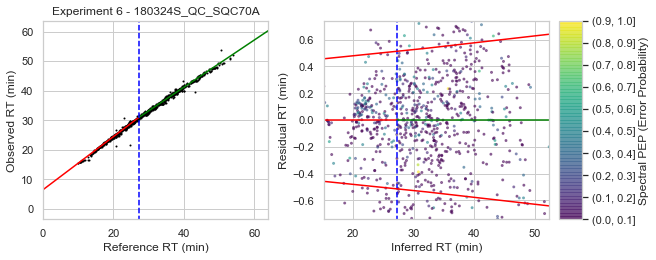

Generating Summary for Experiment 8 | 180324S_QC_SQC70B


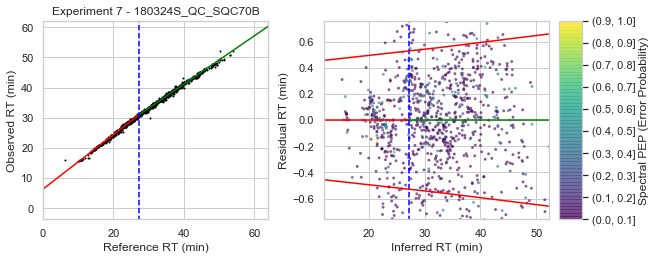

Generating Summary for Experiment 9 | 180324S_QC_SQC71A


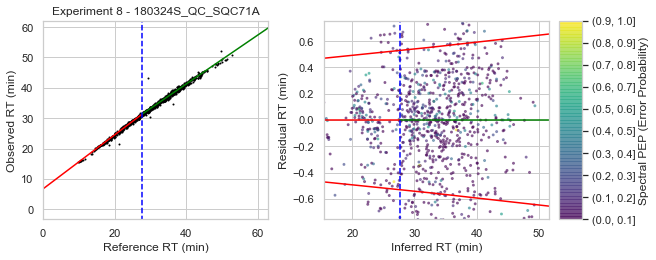

Generating Summary for Experiment 10 | 180324S_QC_SQC71B


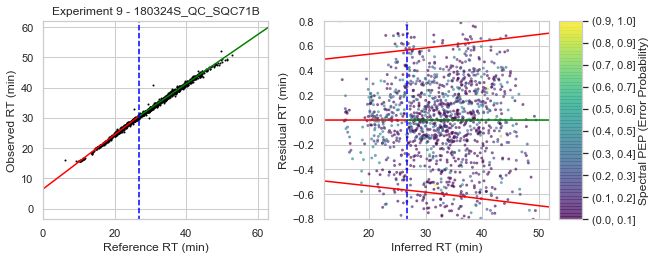

Generating Summary for Experiment 11 | 180402S_QC_SQC72A1


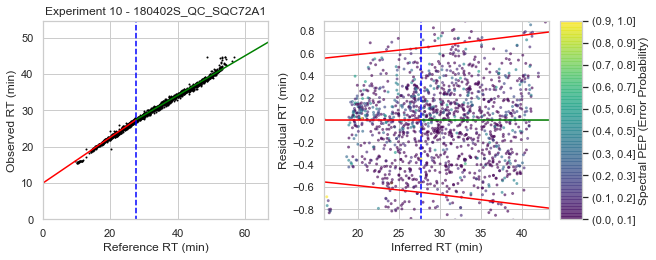

Generating Summary for Experiment 12 | 180402S_QC_SQC72B1


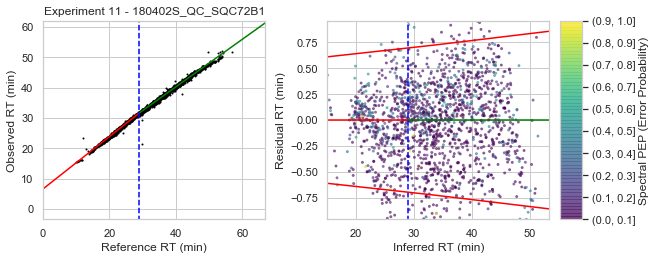

Generating Summary for Experiment 13 | 180402S_QC_SQC73A1


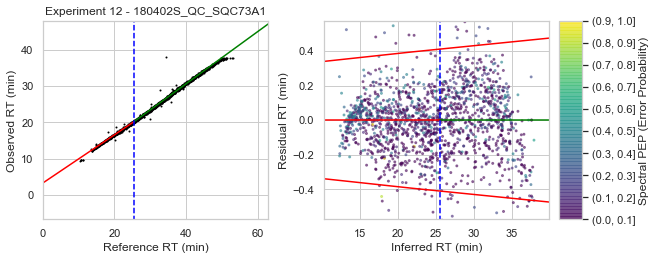

Generating Summary for Experiment 14 | 180402S_QC_SQC73A2


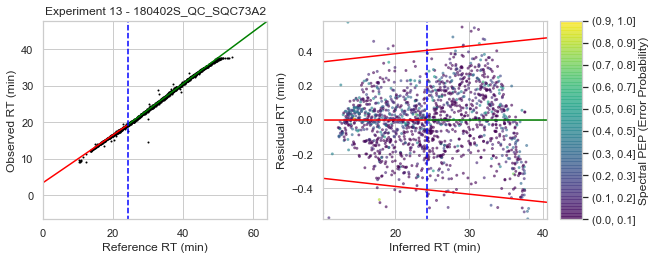

Generating Summary for Experiment 15 | 180406S_QC_SQC74A


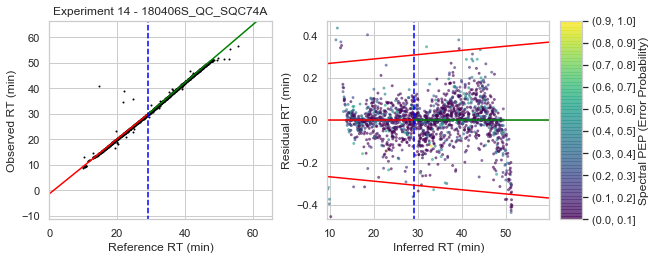

Generating Summary for Experiment 16 | 180406S_QC_SQC74B


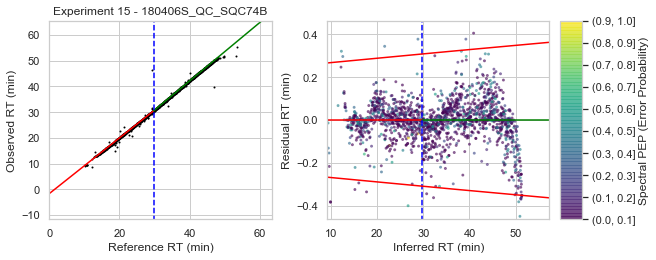

Generating Summary for Experiment 17 | 180408S_QC_SQC75A


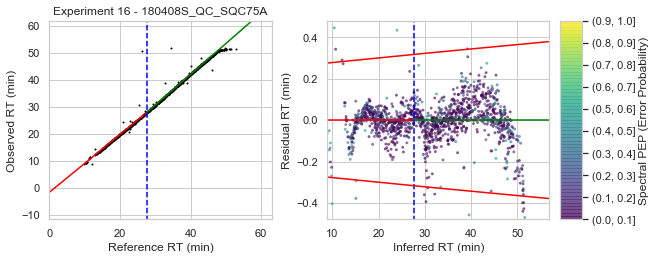

Generating Summary for Experiment 18 | 180408S_QC_SQC75B


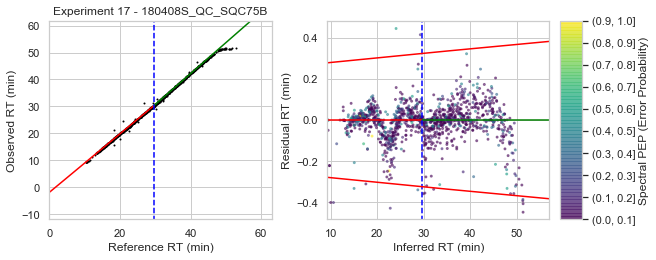

Generating Summary for Experiment 19 | 180409S_QC_SQC76A


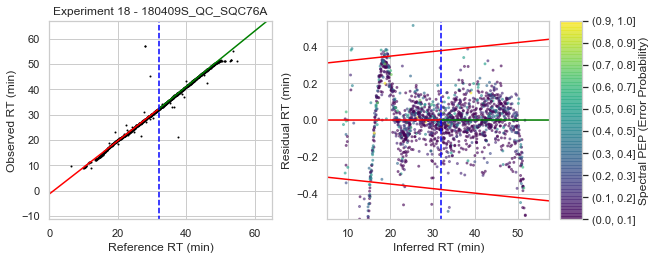

Generating Summary for Experiment 20 | 180409S_QC_SQC76B


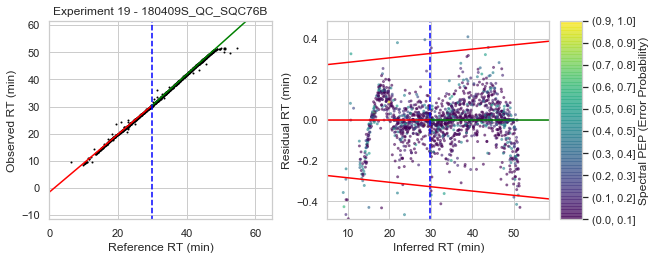

Generating Summary for Experiment 21 | 180411S_QC_SQC77A


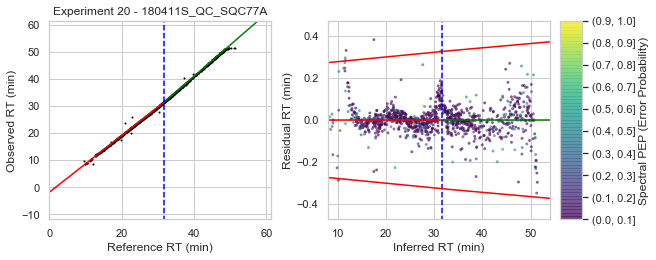

Generating Summary for Experiment 22 | 180411S_QC_SQC77B


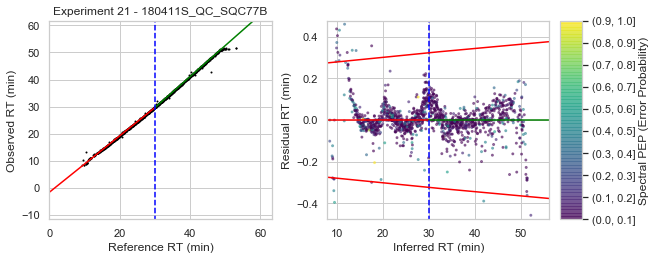

Generating Summary for Experiment 23 | 180413S_X_FP18I


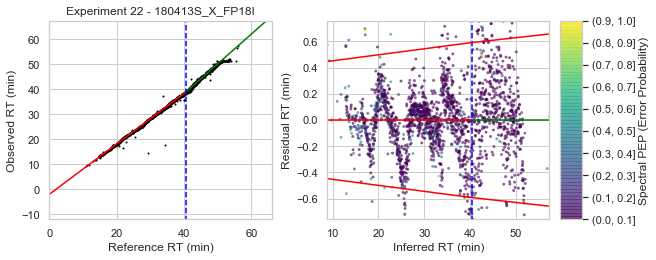

Generating Summary for Experiment 24 | 180413S_X_FP18J


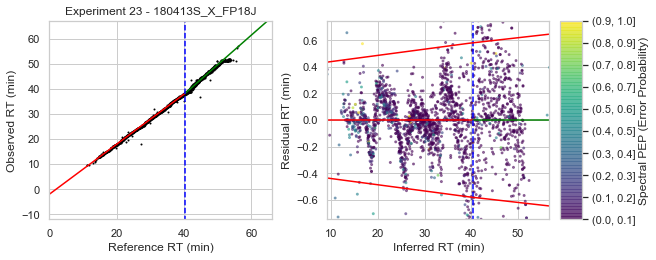

Generating Summary for Experiment 25 | 180413S_X_FP18K


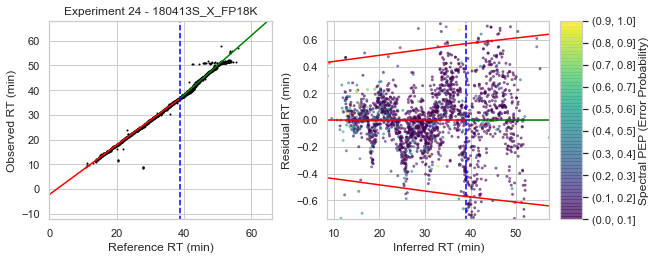

Generating Summary for Experiment 26 | 180416S_QC_SQC78A1


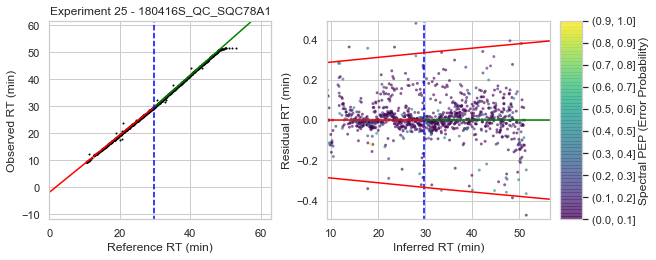

Generating Summary for Experiment 27 | 180420S_QC_SQC79A


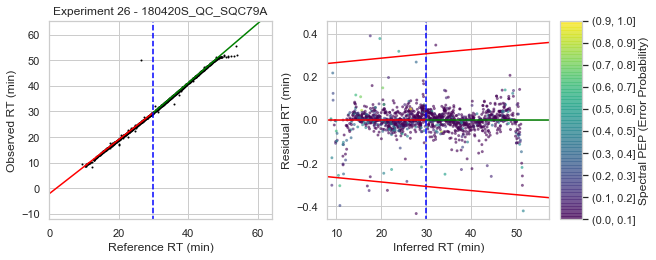

Generating Summary for Experiment 28 | 180420S_QC_SQC79B


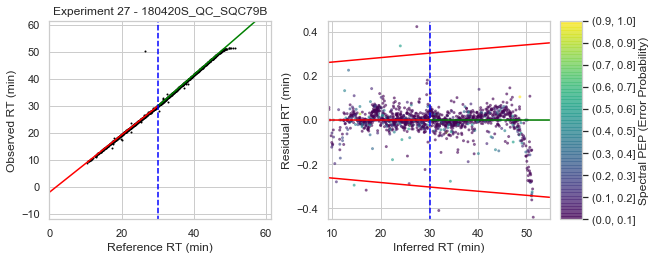

Generating Summary for Experiment 29 | 180420S_QC_SQC80A


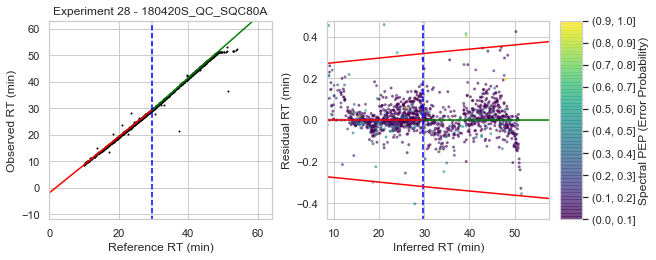

Generating Summary for Experiment 30 | 180420S_QC_SQC80B


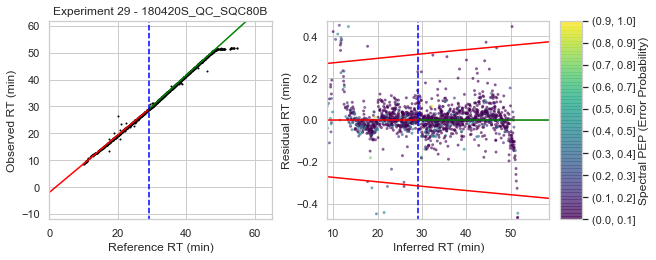

Generating Summary for Experiment 31 | 180424S_QC_SQC81A


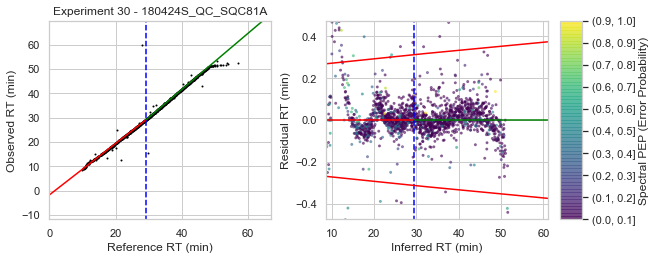

Generating Summary for Experiment 32 | 180424S_QC_SQC81B


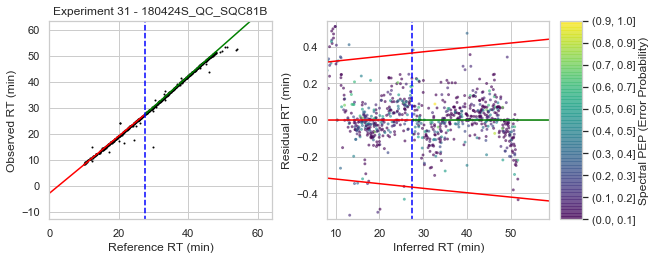

Generating Summary for Experiment 33 | 180424S_X_IFN6H


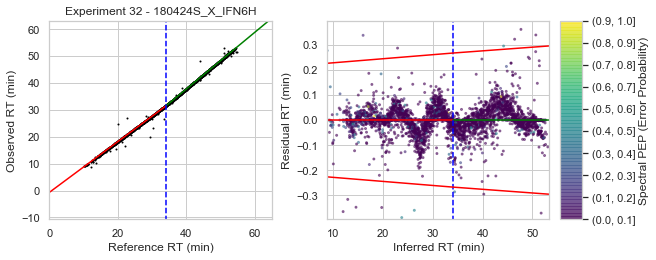

Generating Summary for Experiment 34 | 180424S_X_IFN6I


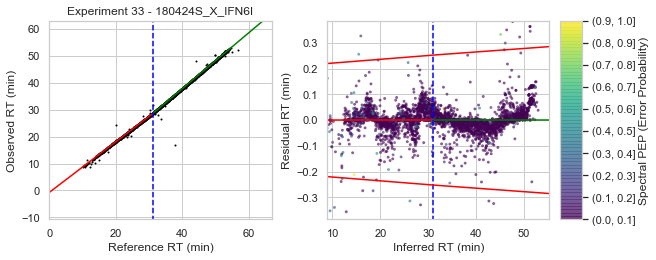

Generating Summary for Experiment 35 | 180424S_X_IFN6J


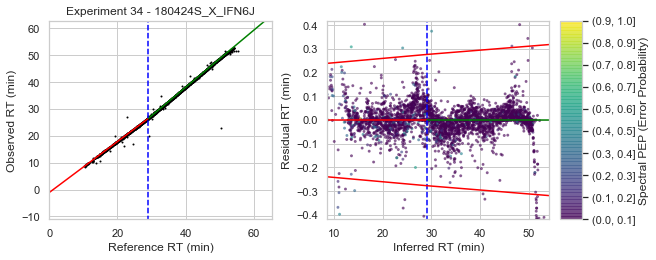

Generating Summary for Experiment 36 | 180424S_X_IFN6K


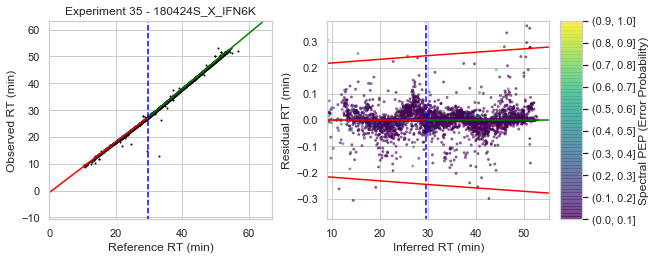

Generating Summary for Experiment 37 | 180502S_QC_SQC82A


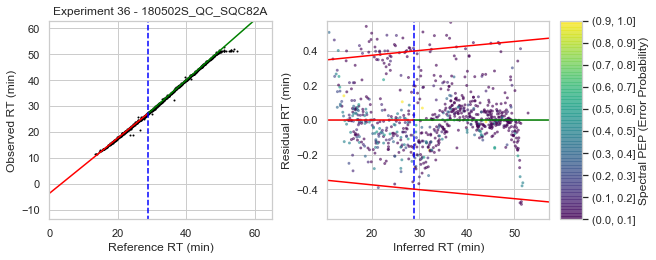

Generating Summary for Experiment 38 | 180502S_QC_SQC82B


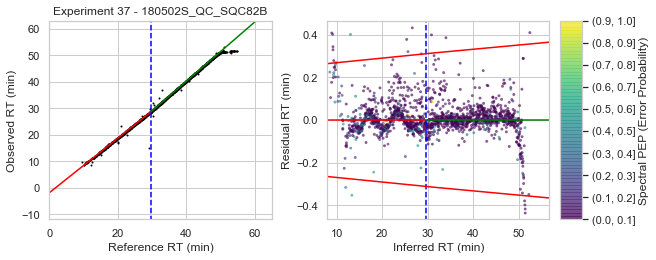

Generating Summary for Experiment 39 | 180503S_QC_SQC83A


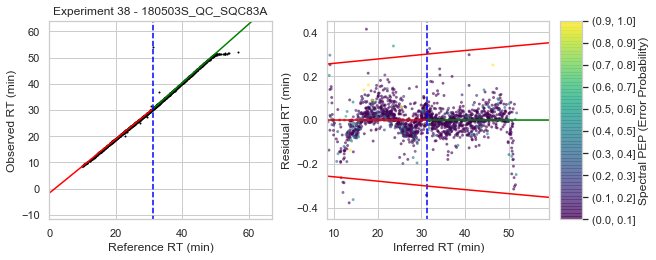

Generating Summary for Experiment 40 | 180503S_QC_SQC83B


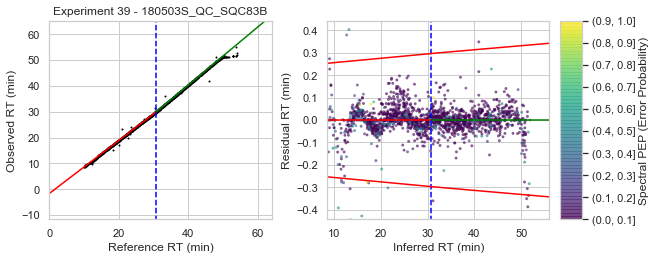

Generating Summary for Experiment 41 | 180503S_QC_SQC84A


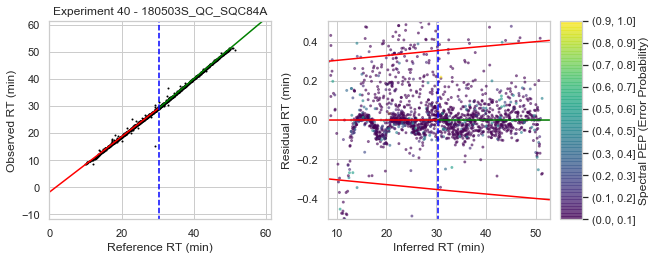

Generating Summary for Experiment 42 | 180503S_QC_SQC84B


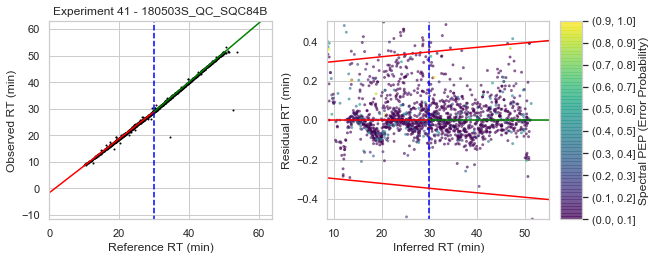

Generating Summary for Experiment 43 | 180503S_QC_SQC85A1


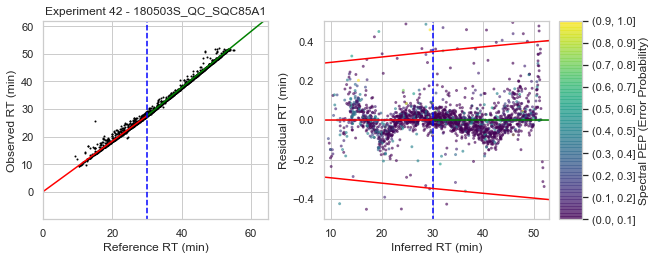

Generating Summary for Experiment 44 | 180503S_QC_SQC85B1


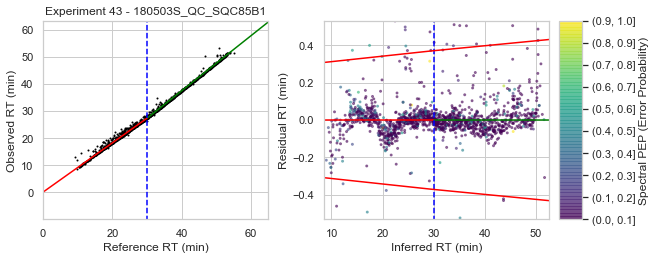

Generating Summary for Experiment 45 | 180503S_QC_SQC86A


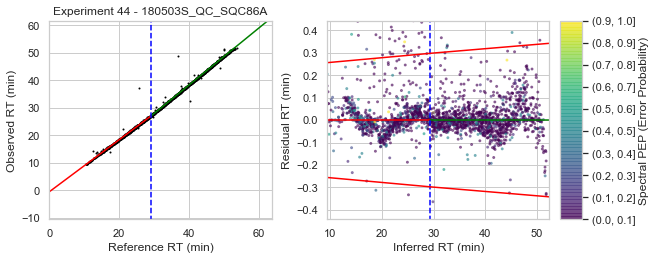

Generating Summary for Experiment 46 | 180503S_QC_SQC86B


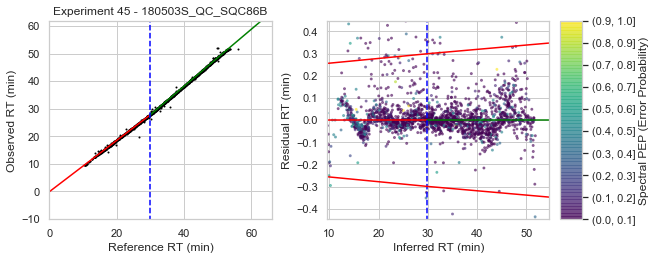

Generating Summary for Experiment 47 | 180514S_QC_SQC95A


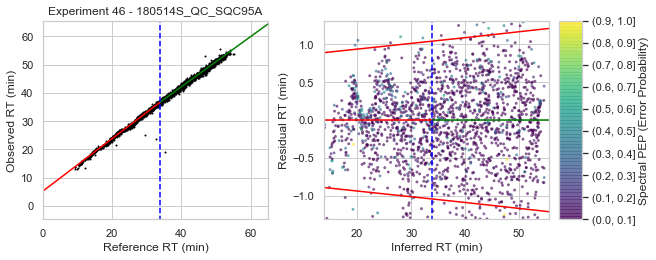

Generating Summary for Experiment 48 | 180524S_X_SQC95A3


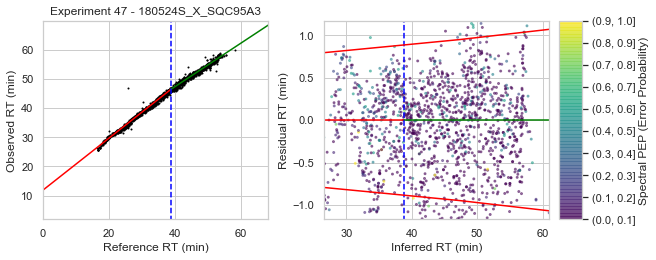

Generating Summary for Experiment 49 | 180528S_QC_SQC97A


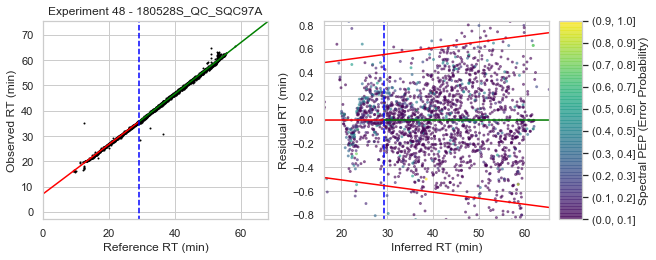

Generating Summary for Experiment 50 | 180528S_QC_SQC97B


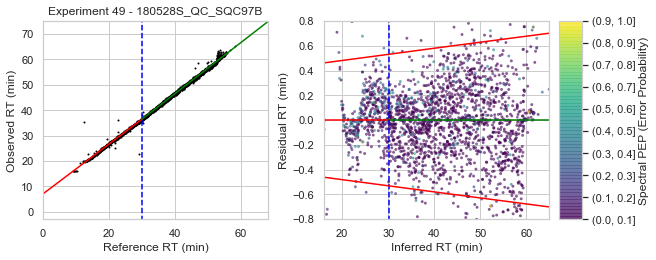

In [6]:
sns.set()
with sns.plotting_context('notebook'):
    sns.set(style='whitegrid', palette='viridis')

dff = df.loc[df['participated'], :]

# figures_path = create_fig_folder(output_path, 'figures')
fig_names = []

exp_names = np.sort(dff[config['col_names']['raw_file']].unique())
num_experiments = len(exp_names)
# ceil PEP to 1
dff.loc[dff[config['col_names']['pep']] > 1, config['col_names']['pep']] = 1
# split PEP into 10 bins, for coloring points later
#pep_col_code = pd.cut(df[config['col_names']['pep']], 10)
pep_col_code = pd.cut(dff[config['col_names']['pep']], np.linspace(0, 1, 11))

# generate figures for each experiment
for exp in range(0, num_experiments):
    
    print('Generating Summary for Experiment {} | {}'.format(exp + 1, exp_names[exp]))

    exp_params = params['exp'].iloc[exp]
    #exp_indices = params['pair']['muij_to_exp'] == exp
    exp_inds = (dff['exp_id'] == exp) & (~pd.isnull(dff['pep_new']))

    # dont plot if there aren't any points
    if np.sum(exp_inds) == 0: 
        continue

    predicted = dff['muij'][exp_inds].values
    predicted_sd = dff['sigmaij'][exp_inds].values
    mus = dff['mu'][exp_inds].values

    # observed values
    observed = dff[config['col_names']['retention_time']][exp_inds].values
    obs_peps = dff[config['col_names']['pep']][exp_inds].values
    obs_code = pep_col_code[exp_inds].values
    residual = observed - predicted
    
    fig = plt.figure(constrained_layout=True)
    gs = fig.add_gridspec(1, 3, width_ratios=[10, 10, 1], height_ratios=[1,])


    # plot the 2-segment linear fit of mus to observed RTs
    ax = fig.add_subplot(gs[0, 0])
    ax.scatter(mus, observed, s=1, color='black')
    ax.plot([0, exp_params['split_point']],
             [exp_params['beta_0'], (exp_params['split_point'] * exp_params['beta_1']) + exp_params['beta_0']],
            color='red')
    ax.plot([exp_params['split_point'], 300], 
             [(exp_params['split_point'] * exp_params['beta_1']) + exp_params['beta_0'], (exp_params['split_point'] * exp_params['beta_1']) + ((300-exp_params['split_point']) * exp_params['beta_2']) + exp_params['beta_0']],
            color='green')
    ax.plot(np.repeat(exp_params['split_point'], 2), [-100, 300], color='blue', linestyle='dashed')
    ax.set(
        xlim=(0, mus.max() + 10), 
        ylim=(exp_params['beta_0'] - 10, observed.max() + 10),
        title='Experiment {} - {}'.format(exp, exp_names[exp]),
        xlabel='Reference RT (min)',
        ylabel='Observed RT (min)'
    )

    # plot residuals, quantiles of residuals, and color points by PEP
    ax = fig.add_subplot(gs[0, 1])
    scatter = ax.scatter(predicted, residual, s=4, c=pep_col_code.cat.codes.values[exp_inds], alpha=0.5, cmap='viridis')
    ax.plot([0, exp_params["split_point"]], [0, 0], color="red")
    ax.plot([exp_params["split_point"], 300], [0, 0], color="green")
    ax.plot(np.repeat(exp_params["split_point"], 2), [-100, 300], color="blue", linestyle="dashed")

    # confidence intervals, 2.5% and 97.5%
    conf_x = predicted[np.argsort(predicted)]
    conf_2p5 = laplace.ppf(0.025, loc=0, scale=predicted_sd)[np.argsort(predicted)]
    conf_97p5 = laplace.ppf(0.975, loc=0, scale=predicted_sd)[np.argsort(predicted)]

    ax.plot(conf_x, conf_2p5, color="red")
    ax.plot(conf_x, conf_97p5, color="red")
    ax.set(
        #xlim=(predicted.min()-5, predicted.max()+5),
        #ylim=(residual.min()-5, residual.max()+5),
        xlim=(conf_x[0], conf_x[-1]),
        ylim=(np.min(conf_2p5) - 0.1, np.max(conf_97p5) + 0.1),
        xlabel='Inferred RT (min)',
        ylabel='Residual RT (min)'
    )

    
    cax = fig.add_subplot(gs[0, 2])
    cbar = fig.colorbar(scatter, cax=cax)
    cbar.set_label('Spectral PEP (Error Probability)')
    cbar.ax.set_yticklabels(pep_col_code.cat.categories.values)

    # add some space between subplots
    # plt.subplots_adjust(hspace=0.3, wspace=0.35, bottom=0.2, right=0.85)

    # finalize and save figure
    # fig = plt.gcf()
    fig.set_size_inches(9, 3.5)
    #_fname = 'alignment_{}_{}.png'.format(str(exp), exp_names[exp])
    #fname = os.path.join(figures_path, _fname)
    #logger.info('Saving figure to {} ...'.format(fname))
    #fig.savefig(fname, dpi=160)
    #fig_names.append(os.path.join('figures', _fname))

    #plt.close()
    #fig.clf()
    plt.show()

# PEP Shifts

A 2D histogram showing the density in PEP shifts. Density below the 45° line represents upgraded PSMs, while density above the line represents downgraded PSMs. Distance from the 45° line represents the magnitude of the confidence shifts.

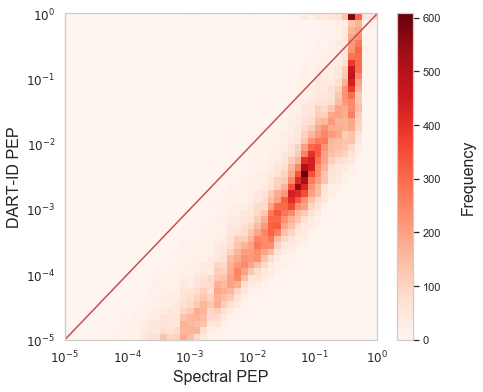

In [7]:
# PEP vs. PEP.new scatterplot
inds = (
    (~pd.isnull(df['pep_new'])) & 
    (df['pep_new'] > 1e-5) & 
    (df[config['col_names']['pep']] > 1e-5)
)

f, ax = plt.subplots()
hst = ax.hist2d(np.log10(df[config['col_names']['pep']][inds]), np.log10(df['pep_new'][inds]), bins=(50, 50), cmap=plt.cm.Reds)
ax.plot([-5, 0], [-5, 0], '-r')

ax.grid()

interval = (-5, 0)
ax.set_xlim(interval)
ax.set_ylim(interval)
ax.set_xlabel('Spectral PEP', fontsize=16)
ax.set_ylabel('DART-ID PEP', fontsize=16)
interval = np.arange(-5, 1, 1)
ax.set_xticks(interval)
ax.set_yticks(interval)
ax.set_xticklabels(['$10^{{{}}}$'.format(i) for i in interval], fontsize=12)
ax.set_yticklabels(['$10^{{{}}}$'.format(i) for i in interval], fontsize=12)

f.set_size_inches(7, 6)
# plt.tight_layout()

cbar = plt.colorbar(hst[3], ax=ax)
cbar.set_label('Frequency', fontsize=16, labelpad=20, ha='center', va='top')
cbar.ax.xaxis.set_label_position('top')

#fname = os.path.join(figures_path, 'pep_new_scatterplot.png')
#logger.info('Saving figure to {} ...'.format(fname))
#f.savefig(fname, dpi=160)
#fig_names.append(fname)
#plt.close()
#f.clf()
plt.show()

# Increase in Confident PSMs

On the top, a line plot showing the percent increase in confident PSMs as a function of the confidence threshold. The dotted line at 0.01 is shown as a reference, i.e., the y-value of the line at PEP Threshold = 0.01 is the percent increase of PSMs when filtering PSMs at PEP \< 0.01.

On the bottom, a line plot showing the fraction of PSMs selected when filtering at a PEP threshold, before and after applying DART-ID. A value of 0.5, for example, means that at a PEP threshold = 0.01, 50% of the peptides were selected at PEP \< 0.01.

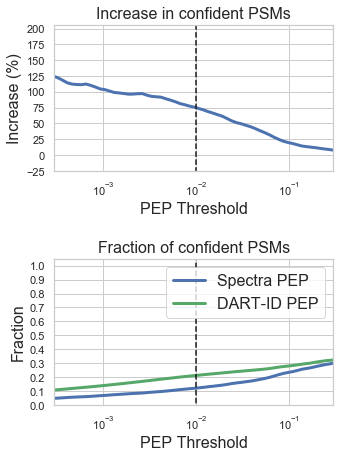

In [11]:
sns.set(style='whitegrid')


# Fold-change increase
num_points=100
x = np.logspace(-5, 0, num=num_points)
y = np.zeros(num_points)
y2 = np.zeros(num_points)
y3 = np.zeros(num_points)
inds = ~pd.isnull(df['pep_new'])

for i, j in enumerate(x):
    y[i] = np.sum(df['dart_PEP'] < j) / np.sum(df[config['col_names']['pep']] < j)
    y2[i] = np.sum(df[config['col_names']['pep']] < j) / df.shape[0]
    y3[i] = np.sum(df['dart_PEP'] < j) / df.shape[0]

f, (ax1, ax2) = plt.subplots(2, 1)

ax1.semilogx(x, (y*100)-100, '-b', linewidth=3)
# ax1.plot([np.min(x), np.max(x)], [0, 0], '-r', linestyle='dashed', linewidth=2)
ax1.plot([1e-2, 1e-2], [-1000, 1000], '-k', linestyle='dashed', linewidth=1.5)
ax1.grid()
ax1.set_xlim([3e-4, 3e-1])
ax1.set_ylim([-25, np.max(y)*100-50])
ax1.set_xlabel('PEP Threshold', fontsize=16)
ax1.set_ylabel('Increase (%)', fontsize=16)
ax1.set_title('Increase in confident PSMs', fontsize=16)
ax1.set_xticks([1e-3, 1e-2, 1e-1])
ax1.set_yticks(np.arange(-25, np.max(y)*100-50, 25))
ax1.grid(b=True)

ax2.semilogx(x, y2, '-b', linewidth=3, label='Spectra PEP')
ax2.semilogx(x, y3, '-g', linewidth=3, label='DART-ID PEP')
#ax2.fill_between(x, 0, y2)
ax2.plot([1e-2, 1e-2], [-1000, 1000], '-k', linestyle='dashed', linewidth=1.5)
ax2.grid()
ax2.set_xlim([3e-4, 3e-1])
ax2.set_ylim([0, 1.05])
ax2.set_xticks([1e-3, 1e-2, 1e-1])
ax2.set_yticks(np.arange(0, 1.05, 0.1))
ax2.grid(b=True)
ax2.set_xlabel('PEP Threshold', fontsize=16)
ax2.set_ylabel('Fraction', fontsize=16)
ax2.set_title('Fraction of confident PSMs', fontsize=16)
ax2.legend(fontsize=16)
plt.subplots_adjust(hspace=0.6, wspace=0.3)

f.set_size_inches(5, 7)
# plt.tight_layout()

#fname = os.path.join(figures_path, 'fold_change_ids.png')
#logger.info('Saving figure to {} ...'.format(fname))
#f.savefig(fname, dpi=160)
#fig_names.append(fname)
#plt.close()
#f.clf()

plt.show()